<a href="https://colab.research.google.com/github/anjalinagel12/Deep-Learning-Projects-using-fast.ai/blob/master/planet_understanding_the_amazon_from_space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai


Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html


In [0]:
# import libraries
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os


In [0]:
import pandas as pd

In [0]:
from fastai.vision import *


In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!mkdir -p input
!echo '{"username":"anjalichoudhary12","key":"398be19684c7438546b22c7a58939d65"}'> ~/.kaggle/kaggle.json  


In [0]:
!chmod 600 /root/.kaggle/kaggle.json


In [30]:
cd ..

/content


In [31]:
! kaggle competitions download -c planet-understanding-the-amazon-from-space 

train-jpg.tar.7z: Skipping, found more recently modified local copy (use --force to force download)
test-jpg.tar.7z: Skipping, found more recently modified local copy (use --force to force download)
train-tif-v2.tar.7z: Skipping, found more recently modified local copy (use --force to force download)
test-tif-v2.tar.7z: Skipping, found more recently modified local copy (use --force to force download)
test-jpg-additional.tar.7z: Skipping, found more recently modified local copy (use --force to force download)
Kaggle-planet-test-tif.torrent: Skipping, found more recently modified local copy (use --force to force download)
Kaggle-planet-train-tif.torrent: Skipping, found more recently modified local copy (use --force to force download)
sample_submission_v2.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train_v2.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_v2_file_mapping.csv.zip: Skipping, found

In [32]:
path = Config.data_path()/'planet'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/planet')

In [34]:
!unzip train_v2.csv.zip -d input


Archive:  train_v2.csv.zip
  inflating: input/train_v2.csv      
   creating: input/__MACOSX/
  inflating: input/__MACOSX/._train_v2.csv  


In [36]:
!unzip test_v2_file_mapping.csv.zip -d input


Archive:  test_v2_file_mapping.csv.zip
  inflating: input/test_v2_file_mapping.csv  


In [0]:
train = pd.read_csv('input/train_v2.csv')
test = pd.read_csv('input/test_v2_file_mapping.csv')


In [53]:
train.head()


,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [44]:
test.head().T


,0,1,2,3,4
old,file_4158.tif,file_1668.tif,file_2411.tif,file_16047.tif,file_1271.tif
new,file_18830.tif,file_19164.tif,file_15749.tif,file_7531.tif,file_18347.tif


In [45]:
train.shape


(40479, 2)

In [46]:
test.shape

(20522, 2)

In [52]:
df = pd.read_csv('input/train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [0]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)


In [0]:
np.random.seed(42)
src = (ImageItemList.from_csv('input/', 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .random_split_by_pct(0.2)
       .label_from_df(label_delim=' '))

In [59]:
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train-jpg.tar.7z -p {path}  
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train_v2.csv -p {path}  
! unzip -q -n {path}/train_v2.csv.zip -d {path}


100% 599M/600M [00:04<00:00, 140MB/s]
100% 600M/600M [00:04<00:00, 155MB/s]
  0% 0.00/159k [00:00<?, ?B/s]
100% 159k/159k [00:00<00:00, 73.8MB/s]


In [60]:
! conda install -y -c haasad eidl7zip

/bin/bash: conda: command not found


In [0]:
! 7za -bd -y -so x {path}/train-jpg.tar.7z | tar xf - -C {path.as_posix()}


In [62]:
df = pd.read_csv(path/'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [0]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)


In [0]:
np.random.seed(42)
src = (ImageItemList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .random_split_by_pct(0.2)
       .label_from_df(label_delim=' '))


In [0]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))


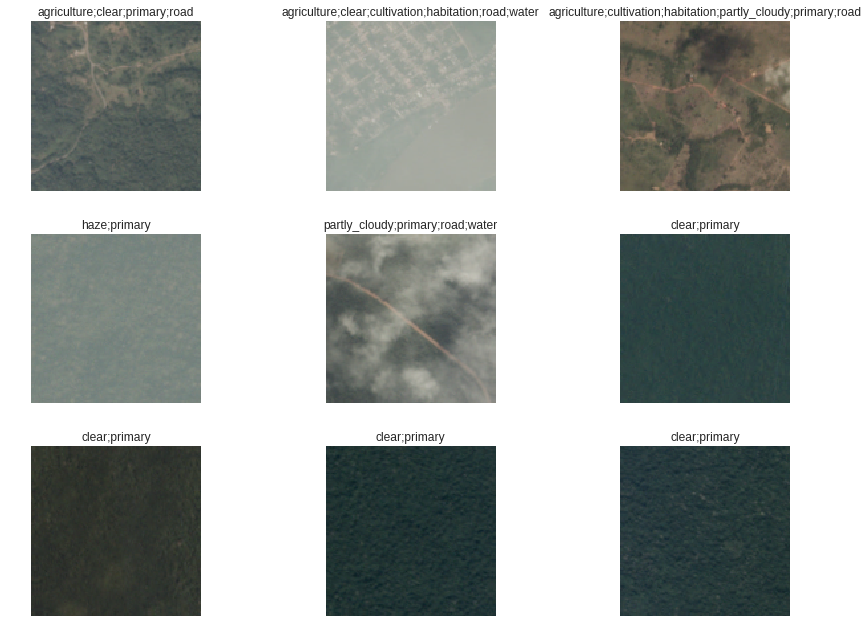

In [66]:
data.show_batch(rows=3, figsize=(12,9))


In [0]:
ls

In [0]:
arch = models.resnet50


In [69]:

acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = create_cnn(data, arch, metrics=[acc_02, f_score])


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:02<00:00, 47881506.38it/s]


In [70]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.29E-02


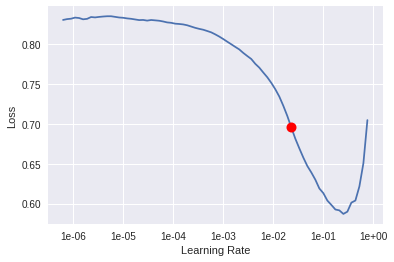

In [71]:
learn.recorder.plot()


In [0]:
lr = 0.02


In [75]:
learn.fit_one_cycle(5, slice(lr))


epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.121870,0.108509,0.952433,0.902599
2,0.116141,0.099116,0.952774,0.915537
3,0.106193,0.094684,0.956640,0.918645
4,0.096370,0.088344,0.955237,0.923067
5,0.088501,0.086380,0.955412,0.924081


In [0]:
learn.save('stage-1-rn50')


In [0]:
learn.unfreeze()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-05


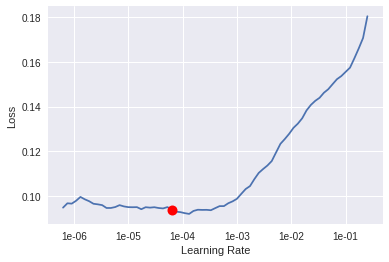

In [78]:
learn.lr_find()
learn.recorder.plot()


In [79]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))


epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.097022,0.092242,0.955150,0.920748
2,0.100267,0.090582,0.956785,0.923541
3,0.090711,0.086984,0.956763,0.924765
4,0.086846,0.083281,0.958827,0.928049
5,0.082699,0.083582,0.957889,0.928728


In [0]:
learn.save('stage-2-rn50')


In [85]:
data = (src.transform(tfms, size=256)
        .databunch().normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape


torch.Size([3, 256, 256])

In [0]:
learn.freeze()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-06


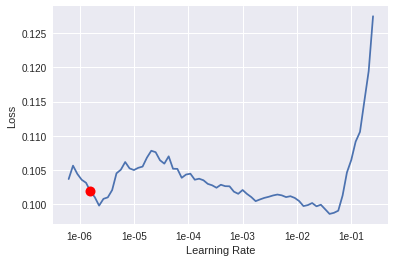

In [87]:

learn.lr_find()
learn.recorder.plot()


In [0]:
lr=1e-6


In [89]:
learn.fit_one_cycle(5, slice(lr))


epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.099477,0.097480,0.955688,0.911370
2,0.100531,0.108505,0.956102,0.912778
3,0.100187,0.103392,0.955746,0.912161
4,0.098091,0.108139,0.956284,0.912062
5,0.101060,0.096958,0.956676,0.912788


In [0]:
learn.save('stage-1-256-rn50')


In [0]:
learn.unfreeze()


In [92]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))


epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.091712,0.087911,0.954991,0.923819
2,0.088067,0.087240,0.957315,0.927200
3,0.087253,0.083783,0.957163,0.928066
4,0.083804,0.087247,0.957105,0.928515
5,0.083635,0.083921,0.957337,0.928251


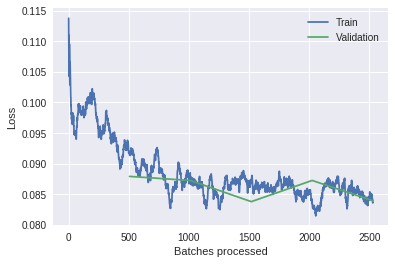

In [93]:
learn.recorder.plot_losses()


In [0]:
learn.save('stage-2-256-rn50')


In [0]:
learn.export()
